In [1]:
#Importing Libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, roc_auc_score
from IPython.display import display, HTML
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
#Loading Dataset
df=pd.read_csv("energydata_complete.csv",sep=',')
#printing the head of the Dataset
df=df.drop(['date'], axis=1) #Dropping Date Column in the Dataset
df.head()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [3]:
#Converting Energy consumption into a Binary Classification Problem
df['Appliances']=(df['Appliances']>int(df['Appliances'].mean())).astype(int)
#Splitting x and y
y=df['Appliances'].values
X=df.drop(['Appliances'], axis=1)
#X=df[['lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',]].values
#Test Train Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20,random_state=100)

In [4]:
def ROC_Plot(y,y_pred,label):
    '''Function to plot ROC characteristics of the model'''
    #Calculating True and False Positive Rate
    fpr, tpr, _ = roc_curve(y,  y_pred)
    
    #Caculating ROC Score
    auc = roc_auc_score(y, y_pred)
    
    #ROC Plot
    plt.plot(fpr,tpr,label=label+", auc="+str(auc))
    plt.legend(loc=4)
    plt.plot([0, 1], [0, 1],'r--')
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()

In [5]:
def Model_Evaluation(model,X,y,label,class0,class1):
    '''Function to evaluate model performance'''
    #To Print the text in Bold
    start = "\033[1m"
    end = "\033[0;0m"
    print(start+ label + "ing Data - Model Evaluation" +end + "\n")
    #Fitting the trained Model
    y_pred = model.predict(X)

    #Calculating Accuracy
    print (label + "ing Accuracy is:", format((accuracy_score(y,y_pred)*100), '.2f'))

    #Printing Confusion Matrix
    print(start + "\n\t\t Confusion Matrix" + end)
    display(pd.DataFrame(
        confusion_matrix(y,y_pred),
        columns=[class0, class1],
        index=[class0, class1]
    ))

    #Printing Classification Report
    print(start + "\n\t\t Classification Report\n" + end)
    print(classification_report(y,y_pred))

    #Plotting ROC
    print(start + "\n\t\t\tROC Curve\n" + end)
    ROC_Plot(y,y_pred,label=label)

### Support Vecor Machines

Linear Kernel

In [6]:
#SVM Linear Kernel
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

SVM (Linear Kernel) Training Data - Model Evaluation

SVM (Linear Kernel) Training Accuracy is: 79.60

		 Confusion Matrix


,Energy Not Consumed,Energy Consumed
Energy Not Consumed,10810,778
Energy Consumed,2442,1758



		 Classification Report

              precision    recall  f1-score   support

           0       0.82      0.93      0.87     11588
           1       0.69      0.42      0.52      4200

   micro avg       0.80      0.80      0.80     15788
   macro avg       0.75      0.68      0.70     15788
weighted avg       0.78      0.80      0.78     15788


			ROC Curve



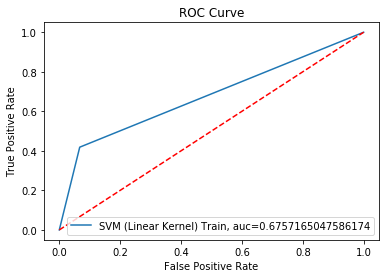

In [7]:
Model_Evaluation(svclassifier,X_train,y_train,label="SVM (Linear Kernel) Train",class0='Energy Not Consumed',class1='Energy Consumed')

SVM (Linear Kernel) Testing Data - Model Evaluation

SVM (Linear Kernel) Testing Accuracy is: 80.42

		 Confusion Matrix


,Energy Not Consumed,Energy Consumed
Energy Not Consumed,2737,199
Energy Consumed,574,437



		 Classification Report

              precision    recall  f1-score   support

           0       0.83      0.93      0.88      2936
           1       0.69      0.43      0.53      1011

   micro avg       0.80      0.80      0.80      3947
   macro avg       0.76      0.68      0.70      3947
weighted avg       0.79      0.80      0.79      3947


			ROC Curve



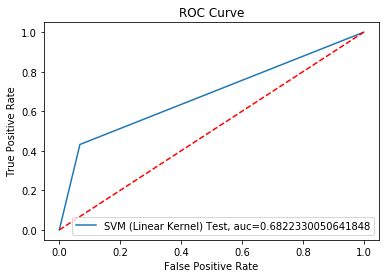

In [8]:
Model_Evaluation(svclassifier,X_test,y_test,label="SVM (Linear Kernel) Test",class0='Energy Not Consumed',class1='Energy Consumed')

Gaussian Kernel

In [9]:
#SVM Gaussian Kernel
C=1.0
svclassifier_gauss = SVC(kernel='rbf',gamma=0.001,C=C)
svclassifier_gauss.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVM (Gaussian Kernel) Training Data - Model Evaluation

SVM (Gaussian Kernel) Training Accuracy is: 83.82

		 Confusion Matrix


,Energy Not Consumed,Energy Consumed
Energy Not Consumed,11069,519
Energy Consumed,2035,2165



		 Classification Report

              precision    recall  f1-score   support

           0       0.84      0.96      0.90     11588
           1       0.81      0.52      0.63      4200

   micro avg       0.84      0.84      0.84     15788
   macro avg       0.83      0.74      0.76     15788
weighted avg       0.83      0.84      0.83     15788


			ROC Curve



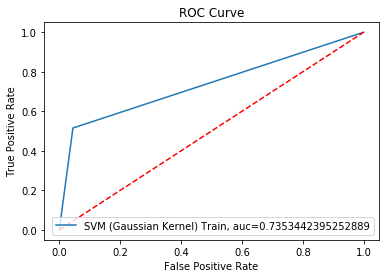

In [10]:
Model_Evaluation(svclassifier_gauss,X_train,y_train,label="SVM (Gaussian Kernel) Train",class0='Energy Not Consumed',class1='Energy Consumed')

SVM (Gaussian Kernel) Testing Data - Model Evaluation

SVM (Gaussian Kernel) Testing Accuracy is: 82.24

		 Confusion Matrix


,Energy Not Consumed,Energy Consumed
Energy Not Consumed,2779,157
Energy Consumed,544,467



		 Classification Report

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      2936
           1       0.75      0.46      0.57      1011

   micro avg       0.82      0.82      0.82      3947
   macro avg       0.79      0.70      0.73      3947
weighted avg       0.81      0.82      0.81      3947


			ROC Curve



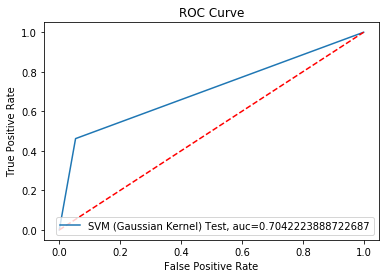

In [11]:
Model_Evaluation(svclassifier_gauss,X_test,y_test,label="SVM (Gaussian Kernel) Test",class0='Energy Not Consumed',class1='Energy Consumed')

In [12]:
#SVM Sigmoid Kernel
svclassifier_sig = SVC(kernel='sigmoid',gamma=0.001,C=C)
svclassifier_sig.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='sigmoid',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVM (Sigmoid Kernel) Training Data - Model Evaluation

SVM (Sigmoid Kernel) Training Accuracy is: 73.40

		 Confusion Matrix


,Energy Not Consumed,Energy Consumed
Energy Not Consumed,11588,0
Energy Consumed,4200,0



		 Classification Report

              precision    recall  f1-score   support

           0       0.73      1.00      0.85     11588
           1       0.00      0.00      0.00      4200

   micro avg       0.73      0.73      0.73     15788
   macro avg       0.37      0.50      0.42     15788
weighted avg       0.54      0.73      0.62     15788


			ROC Curve



C:\Users\sudha\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


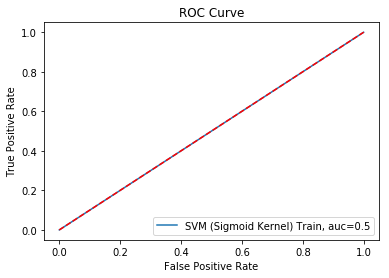

In [13]:
Model_Evaluation(svclassifier_sig,X_train,y_train,label="SVM (Sigmoid Kernel) Train",class0='Energy Not Consumed',class1='Energy Consumed')

SVM (Sigmoid Kernel) Testing Data - Model Evaluation

SVM (Sigmoid Kernel) Testing Accuracy is: 74.39

		 Confusion Matrix


,Energy Not Consumed,Energy Consumed
Energy Not Consumed,2936,0
Energy Consumed,1011,0



		 Classification Report

              precision    recall  f1-score   support

           0       0.74      1.00      0.85      2936
           1       0.00      0.00      0.00      1011

   micro avg       0.74      0.74      0.74      3947
   macro avg       0.37      0.50      0.43      3947
weighted avg       0.55      0.74      0.63      3947


			ROC Curve



C:\Users\sudha\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


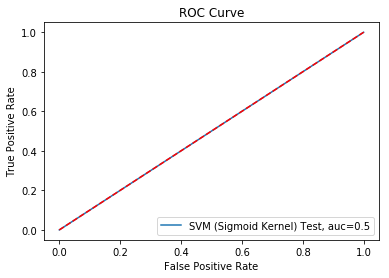

In [14]:
Model_Evaluation(svclassifier_sig,X_test,y_test,label="SVM (Sigmoid Kernel) Test",class0='Energy Not Consumed',class1='Energy Consumed')

In [15]:
#Cross Validated SVM
param_grid = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
 ]
svclassifier_grid = SVC()

grid_svm = GridSearchCV(svclassifier_grid, param_grid)
grid_svm.fit(X_train, y_train)

C:\Users\sudha\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']}, {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [16]:
print('Best score for SVM:', grid_svm.best_params_) 

Best score for SVM: {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}


SVM (Grid Search) Training Data - Model Evaluation

SVM (Grid Search) Training Accuracy is: 87.28

		 Confusion Matrix


,Energy Not Consumed,Energy Consumed
Energy Not Consumed,10993,595
Energy Consumed,1413,2787



		 Classification Report

              precision    recall  f1-score   support

           0       0.89      0.95      0.92     11588
           1       0.82      0.66      0.74      4200

   micro avg       0.87      0.87      0.87     15788
   macro avg       0.86      0.81      0.83     15788
weighted avg       0.87      0.87      0.87     15788


			ROC Curve



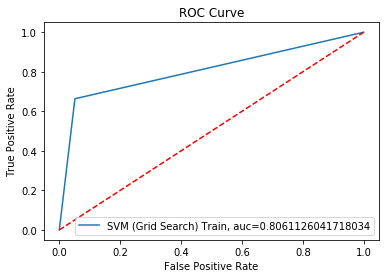

In [17]:
Model_Evaluation(grid_svm,X_train,y_train,label="SVM (Grid Search) Train",class0='Energy Not Consumed',class1='Energy Consumed')

SVM (Grid Search) Testing Data - Model Evaluation

SVM (Grid Search) Testing Accuracy is: 86.04

		 Confusion Matrix


,Energy Not Consumed,Energy Consumed
Energy Not Consumed,2751,185
Energy Consumed,366,645



		 Classification Report

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      2936
           1       0.78      0.64      0.70      1011

   micro avg       0.86      0.86      0.86      3947
   macro avg       0.83      0.79      0.80      3947
weighted avg       0.86      0.86      0.86      3947


			ROC Curve



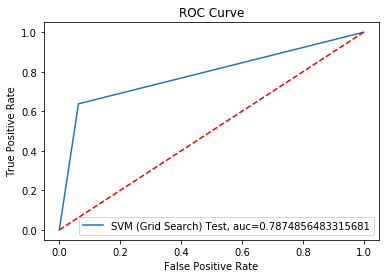

In [18]:
Model_Evaluation(grid_svm,X_test,y_test,label="SVM (Grid Search) Test",class0='Energy Not Consumed',class1='Energy Consumed')

In [20]:
from sklearn.model_selection import cross_val_score

svc_cross = SVC(C= 1000, gamma= 0.0001, kernel= 'rbf')

accuracy = cross_val_score(svc_cross, X_train, y_train, scoring='accuracy', cv = 20)
print(accuracy)
#get the mean of each fold 
print("Accuracy of Model with Cross Validation is:",accuracy.mean() * 100)

[0.85316456 0.84556962 0.83670886 0.8556962  0.85189873 0.85443038
 0.84303797 0.84556962 0.84917617 0.83776933 0.85931559 0.83396705
 0.85171103 0.85931559 0.85678074 0.85297845 0.85171103 0.84790875
 0.86692015 0.84157161]
Accuracy of Model with Cross Validation is: 84.97600712326128


## **Decision Trees**

In [24]:
#Decision Tree with GINI Index
tree_model = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=3, min_samples_leaf=5)
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

Decision Tree (Gini Index) Training Data - Model Evaluation

Decision Tree (Gini Index) Training Accuracy is: 74.66

		 Confusion Matrix


,Energy Not Consumed,Energy Consumed
Energy Not Consumed,11218,370
Energy Consumed,3630,570



		 Classification Report

              precision    recall  f1-score   support

           0       0.76      0.97      0.85     11588
           1       0.61      0.14      0.22      4200

   micro avg       0.75      0.75      0.75     15788
   macro avg       0.68      0.55      0.54     15788
weighted avg       0.72      0.75      0.68     15788


			ROC Curve



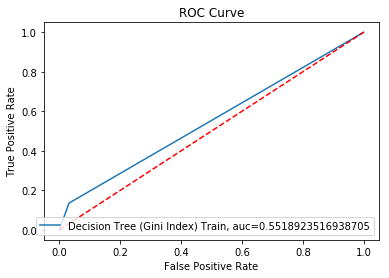

In [35]:
Model_Evaluation(tree_model,X_train,y_train,label="Decision Tree (Gini Index) Train",class0='Energy Not Consumed',class1='Energy Consumed')

Decision Tree (Gini Index) Testing Data - Model Evaluation

Decision Tree (Gini Index) Testing Accuracy is: 75.42

		 Confusion Matrix


,Energy Not Consumed,Energy Consumed
Energy Not Consumed,2832,104
Energy Consumed,866,145



		 Classification Report

              precision    recall  f1-score   support

           0       0.77      0.96      0.85      2936
           1       0.58      0.14      0.23      1011

   micro avg       0.75      0.75      0.75      3947
   macro avg       0.67      0.55      0.54      3947
weighted avg       0.72      0.75      0.69      3947


			ROC Curve



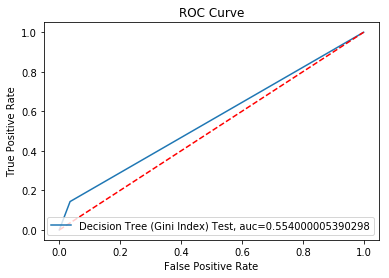

In [36]:
Model_Evaluation(tree_model,X_test,y_test,label="Decision Tree (Gini Index) Test",class0='Energy Not Consumed',class1='Energy Consumed')

In [39]:
#Decision Tree with Information
clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100, min_samples_leaf=5)
clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

Decision Tree (Entropy) Training Data - Model Evaluation

Decision Tree (Entropy) Training Accuracy is: 95.50

		 Confusion Matrix


,Energy Not Consumed,Energy Consumed
Energy Not Consumed,11290,298
Energy Consumed,412,3788



		 Classification Report

              precision    recall  f1-score   support

           0       0.96      0.97      0.97     11588
           1       0.93      0.90      0.91      4200

   micro avg       0.96      0.96      0.96     15788
   macro avg       0.95      0.94      0.94     15788
weighted avg       0.95      0.96      0.95     15788


			ROC Curve



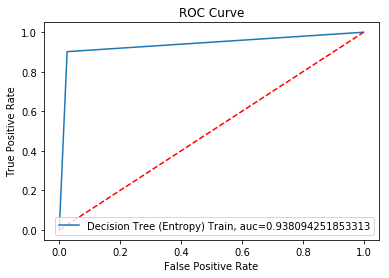

In [40]:
Model_Evaluation(clf_entropy,X_train,y_train,label="Decision Model_Evaluation(clf_entropy4,X_train,y_train,label="Decision Tree (Max Depth=4) Train",class0='Energy Not Consumed',class1='Energy Consumed')Tree (Entropy) Train",class0='Energy Not Consumed',class1='Energy Consumed')

Decision Tree (Entropy) Testing Data - Model Evaluation

Decision Tree (Entropy) Testing Accuracy is: 86.07

		 Confusion Matrix


,Energy Not Consumed,Energy Consumed
Energy Not Consumed,2679,257
Energy Consumed,293,718



		 Classification Report

              precision    recall  f1-score   support

           0       0.90      0.91      0.91      2936
           1       0.74      0.71      0.72      1011

   micro avg       0.86      0.86      0.86      3947
   macro avg       0.82      0.81      0.81      3947
weighted avg       0.86      0.86      0.86      3947


			ROC Curve



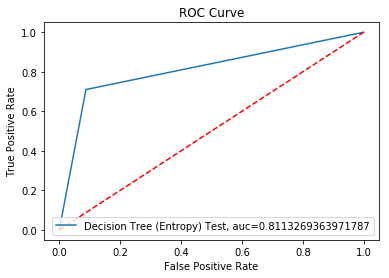

In [41]:
Model_Evaluation(clf_entropy,X_test,y_test,label="Decision Tree (Entropy) Test",class0='Energy Not Consumed',class1='Energy Consumed')

In [42]:
#Decision Tree with Information
clf_entropy4 = DecisionTreeClassifier(criterion = "entropy", random_state = 100,
 max_depth=4, min_samples_leaf=5)
clf_entropy4.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

Decision Tree (Max Depth=4) Training Data - Model Evaluation

Decision Tree (Max Depth=4) Training Accuracy is: 77.03

		 Confusion Matrix


,Energy Not Consumed,Energy Consumed
Energy Not Consumed,10994,594
Energy Consumed,3033,1167



		 Classification Report

              precision    recall  f1-score   support

           0       0.78      0.95      0.86     11588
           1       0.66      0.28      0.39      4200

   micro avg       0.77      0.77      0.77     15788
   macro avg       0.72      0.61      0.62     15788
weighted avg       0.75      0.77      0.73     15788


			ROC Curve



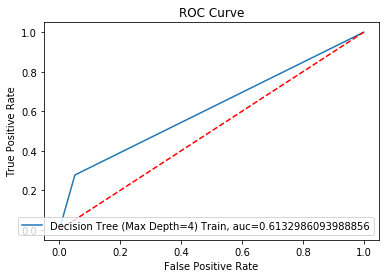

In [43]:
Model_Evaluation(clf_entropy4,X_train,y_train,label="Decision Tree (Max Depth=4) Train",class0='Energy Not Consumed',class1='Energy Consumed')

Decision Tree (Max Depth=4) Testing Data - Model Evaluation

Decision Tree (Max Depth=4) Testing Accuracy is: 76.41

		 Confusion Matrix


,Energy Not Consumed,Energy Consumed
Energy Not Consumed,2750,186
Energy Consumed,745,266



		 Classification Report

              precision    recall  f1-score   support

           0       0.79      0.94      0.86      2936
           1       0.59      0.26      0.36      1011

   micro avg       0.76      0.76      0.76      3947
   macro avg       0.69      0.60      0.61      3947
weighted avg       0.74      0.76      0.73      3947


			ROC Curve



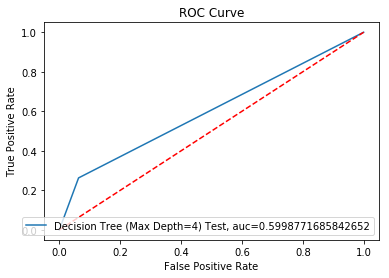

In [44]:
Model_Evaluation(clf_entropy4,X_test,y_test,label="Decision Tree (Max Depth=4) Test",class0='Energy Not Consumed',class1='Energy Consumed')

In [49]:
#Ada boost
#Decision Tree with Information with Adaboost
clf_entropy_no_ada = DecisionTreeClassifier(criterion = "entropy", random_state = 100,
 max_depth=4, min_samples_leaf=5)
clf_entropy_no_ada.fit(X_train, y_train)

clf_entropy_ada = AdaBoostClassifier(base_estimator= clf_entropy_no_ada,n_estimators=400,learning_rate=1)
clf_entropy_ada.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best'),
          learning_rate=1, n_estimators=400, random_state=None)

Ada Boosted Decision Tree Training Data - Model Evaluation

Ada Boosted Decision Tree Training Accuracy is: 100.00

		 Confusion Matrix


,Energy Not Consumed,Energy Consumed
Energy Not Consumed,11588,0
Energy Consumed,0,4200



		 Classification Report

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11588
           1       1.00      1.00      1.00      4200

   micro avg       1.00      1.00      1.00     15788
   macro avg       1.00      1.00      1.00     15788
weighted avg       1.00      1.00      1.00     15788


			ROC Curve



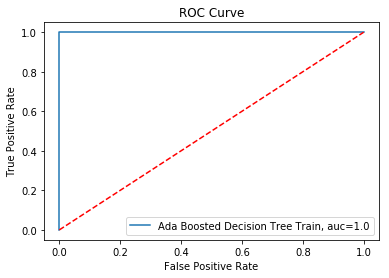

In [50]:
Model_Evaluation(clf_entropy_ada,X_train,y_train,label="Ada Boosted Decision Tree Train",class0='Energy Not Consumed',class1='Energy Consumed')

Ada Boosted Decision Tree Testing Data - Model Evaluation

Ada Boosted Decision Tree Testing Accuracy is: 88.29

		 Confusion Matrix


,Energy Not Consumed,Energy Consumed
Energy Not Consumed,2738,198
Energy Consumed,264,747



		 Classification Report

              precision    recall  f1-score   support

           0       0.91      0.93      0.92      2936
           1       0.79      0.74      0.76      1011

   micro avg       0.88      0.88      0.88      3947
   macro avg       0.85      0.84      0.84      3947
weighted avg       0.88      0.88      0.88      3947


			ROC Curve



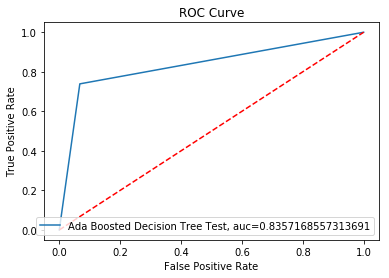

In [51]:
Model_Evaluation(clf_entropy_ada,X_test,y_test,label="Ada Boosted Decision Tree Test",class0='Energy Not Consumed',class1='Energy Consumed')

In [52]:
#Ada boost
#Decision Tree with Information with Adaboost
clf_entropy_no_ada = DecisionTreeClassifier(criterion = "entropy", random_state = 100,
 max_depth=4, min_samples_leaf=5)

clf_entropy_ada_cross = AdaBoostClassifier(base_estimator= clf_entropy_no_ada,n_estimators=400,learning_rate=1)

accuracy = cross_val_score(clf_entropy_ada_cross, X_train, y_train, scoring='accuracy', cv = 10)
print(accuracy)
#get the mean of each fold 
print("Accuracy of Model with Cross Validation is:",accuracy.mean() * 100)

[0.89043699 0.88157061 0.86637112 0.86827106 0.87080431 0.87143762
 0.8809373  0.87903737 0.87072243 0.88149556]
Accuracy of Model with Cross Validation is: 87.61084368586107


In [0]:
#Reference Links
#https://stackabuse.com/implementing-svm-and-kernel-svm-with-pythons-scikit-learn/
#https://dataaspirant.com/2017/02/01/decision-tree-algorithm-python-with-scikit-learn/
#https://medium.com/@rnbrown/creating-and-visualizing-decision-trees-with-python-f8e8fa394176
#https://www.python-course.eu/Boosting.php
#https://towardsdatascience.com/understanding-data-science-classification-metrics-in-scikit-learn-in-python-3bc336865019 #ROC